In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

with open(r'D:\TFG\tfg_git\data\news3.pkl', 'rb') as f:
    data = pickle.load(f)

In [2]:
data.head(1)

url           published  \
0  https://www.washingtontimes.com/news/2020/feb/... 2020-02-20 22:17:00   

              crawled                author                   topic  \
0 2020-02-21 00:30:41  THE WASHINGTON TIMES  BERNIESANDERS_SINYMISQ   

                                       uuid  \
0  e9a7d4b85ff749c57825105385ceb287de629c56   

                                              title  \
0  LETTERS TO THE EDITOR: A barren Democratic field   

                                                text                 site  \
0  By THE WASHINGTON TIMES - - Thursday, February...  washingtontimes.com   

   domainRank        timeDiff  authorInText twAccountMentions  \
0        3106 0 days 02:13:41          True                []   

                                          clean_text  \
0  By THE WASHINGTON TIMES - - Thursday, February...   

                                       personCounter  
0  {'Michael Bloomberg': 1, 'Bernie Sanders': 1, ...

In [3]:
data = data[data["clean_text"].str.len() >0 ]
# Hay 16 noticias que tienen una longitud ==0

In [4]:
authors = data.author.value_counts().head(11)[1:]
au = authors.index.tolist()
n = authors.tolist()
# Figure Size
fig, ax = plt.subplots(figsize =(16, 10))
 
# Horizontal Bar Plot
ax.barh(au, n)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax.set_title("Principales autores de las notícias", y=0.98, fontsize=14)
 
# Add Text watermark
#fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
#         color ='grey', ha ='right', va ='bottom',
#         alpha = 0.7)
 
# Show Plot
plt.show()

In [5]:
# text length

lengths = []
for i in data.clean_text: 
    lengths.append(len(i))
    
print(sum(lengths)/len(lengths))
print(np.max(lengths))
print(np.min(lengths)) 

6557.6830308290255
99688
88


In [6]:
# candidatos: 
# Joe Biden
# Bernie Sanders
# Elizabeth Warren
# Michael Bloomberg 
#Pete Buttigieg.
counter = data.personCounter.tolist()

In [7]:
keys = ["Joe Biden", "Biden", "Sanders", "Bernie Sanders", "Elizabeth Warren", "Warren", "Michael Bloomberg", "Bloomberg", "Pete Buttigieg", "Buttigieg"]
d = []
for c in counter: 
    counters_aux = []
    for key in [0,2,4,6,8]:
        aux = c.get(keys[key], 0)
        aux2 = c.get(keys[key+1], 0)       
        counters_aux.append(aux+aux2)   
    d.append(counters_aux)

In [8]:
cols = ["Biden", "Sanders", "Warren", "Bloomberg", "Buttigieg"]
counter_df = pd.DataFrame(d, columns=cols)

In [9]:
# veces que aparece mencionado cada uno de los candidatos en los articulos
counter_df.sum()

Biden        36981
Sanders      78810
Warren       19408
Bloomberg    16947
Buttigieg    24431
dtype: int64

In [10]:
# veces que aparecen los candidatos en los articulos (al menos aparece una vez sus nombres)

keys = ["Joe Biden", "Biden", "Sanders", "Bernie Sanders", "Elizabeth Warren", "Warren", "Michael Bloomberg", "Bloomberg", "Pete Buttigieg", "Buttigieg"]
d = []
for c in counter: 
    counters_aux = []
    for key in [0,2,4,6,8]:
        aux = c.get(keys[key], 0)
        
        if aux!=0: 
            aux=1
        aux2 = c.get(keys[key+1], 0)   
        
        if aux2!=0: 
            aux2=1
        counters_aux.append(aux)   
    d.append(counters_aux)


In [11]:
counter_df_unit = pd.DataFrame(d, columns=cols)

In [12]:
counter_df_unit.sum()

Biden        6738
Sanders      7769
Warren       4635
Bloomberg    2115
Buttigieg    4549
dtype: int64

In [13]:
data["published_short"] = pd.to_datetime(data["published"]).dt.date

news_per_day = data.groupby(["published_short"])["url"].count()
date = news_per_day.index.tolist()
count = news_per_day.tolist()

news_per_day =  pd.DataFrame()
news_per_day["date"] = date
news_per_day["count"] = count


In [14]:
news_per_day = data.groupby(["published_short"])["url"].count()


In [15]:
# vamos a ver cuantos mails hay por candidato

mails = pd.read_csv(r"D:\TFG\tfg_git\data\corpus_v1.0\corpus_v1.0.csv", 
                   low_memory=False)
mails = mails[(mails["date"] >= "2020-01-30") & (mails["date"] <= "2020-03-02") ]

In [16]:
candidates = ["Joe Biden", "Bernie Sanders", "Elizabeth Warren", "Michael Bloomberg", "Pete Buttigieg"]
mails_filtered = mails[mails["name"].isin(candidates)]

In [17]:
mails_filtered.groupby(["name"])["subject"].count()

name
Bernie Sanders       108
Elizabeth Warren     131
Joe Biden            159
Michael Bloomberg     45
Pete Buttigieg       225
Name: subject, dtype: int64

In [18]:
import seaborn as sns

counter_df_unit.sum()

Biden        6738
Sanders      7769
Warren       4635
Bloomberg    2115
Buttigieg    4549
dtype: int64

In [20]:
mails_filtered.groupby(["name"])["subject"].count()

name
Bernie Sanders       108
Elizabeth Warren     131
Joe Biden            159
Michael Bloomberg     45
Pete Buttigieg       225
Name: subject, dtype: int64

In [21]:
authors = counter_df_unit.sum()
dff = pd.DataFrame(authors, columns=["news"])
dff["mails"] = [159, 108, 131, 45, 225]

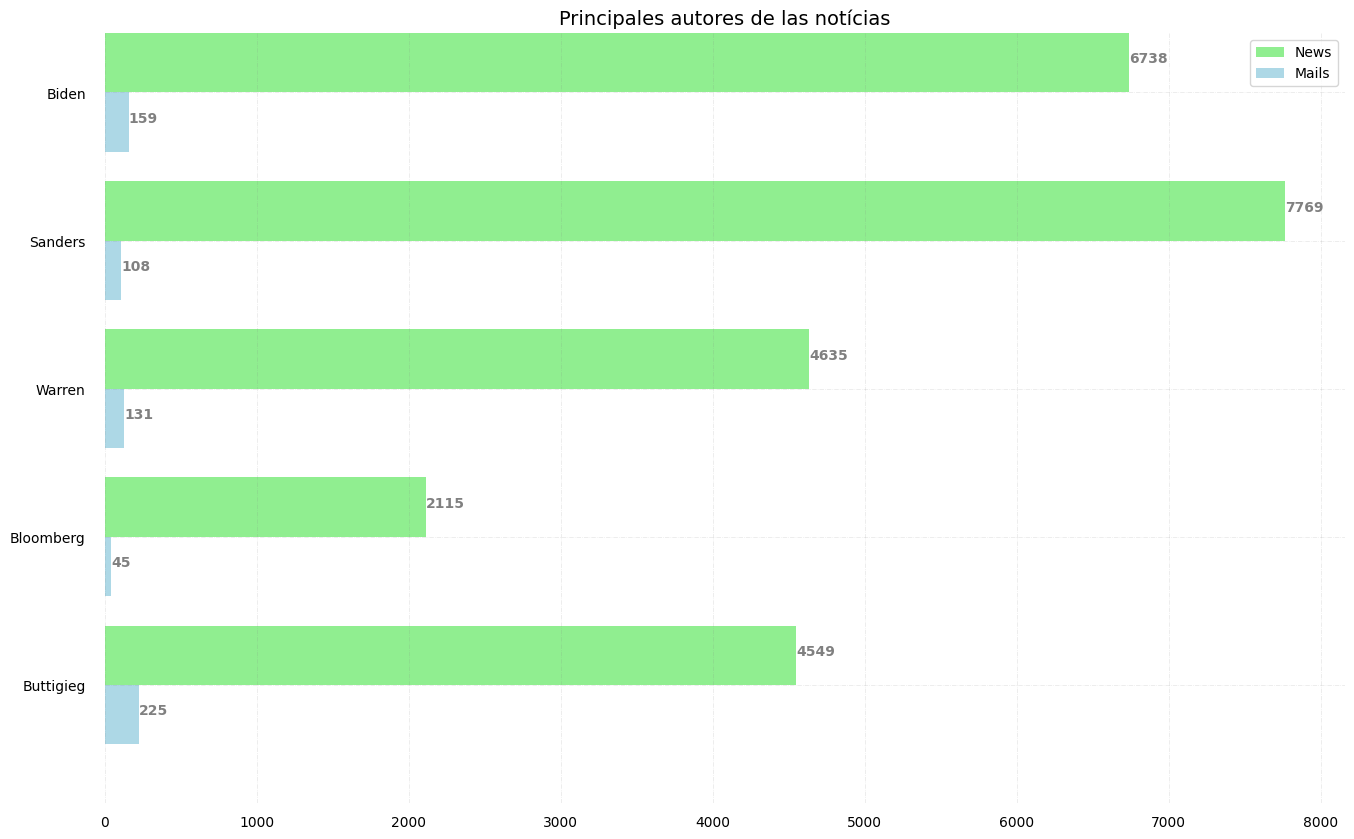

In [22]:

# Figure Size
fig, ax = plt.subplots(figsize =(16, 10))
 
ind = np.arange(len(dff))
width=0.4

# Horizontal Bar Plot
ax.barh(ind, dff.news, width, color='lightgreen', label='News')
ax.barh(ind + width, dff.mails, width, color='lightblue', label='Mails')

ax.set(yticks=ind + 0.2, yticklabels=dff.index.tolist(), ylim=[2*width - 1, len(dff)])
ax.legend()

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.2,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
    
ax.set_title("Principales autores de las notícias", y=1, fontsize=14)
 
# Add Text watermark
#fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
#         color ='grey', ha ='right', va ='bottom',
#         alpha = 0.7)
 
# Show Plot
plt.show()

In [23]:
# vamos a hacer el plot de la fecha de las noticias
mails_per_day = mails_filtered.groupby(["date"])["name"].count()

In [24]:
dates = mails_per_day.index.tolist()

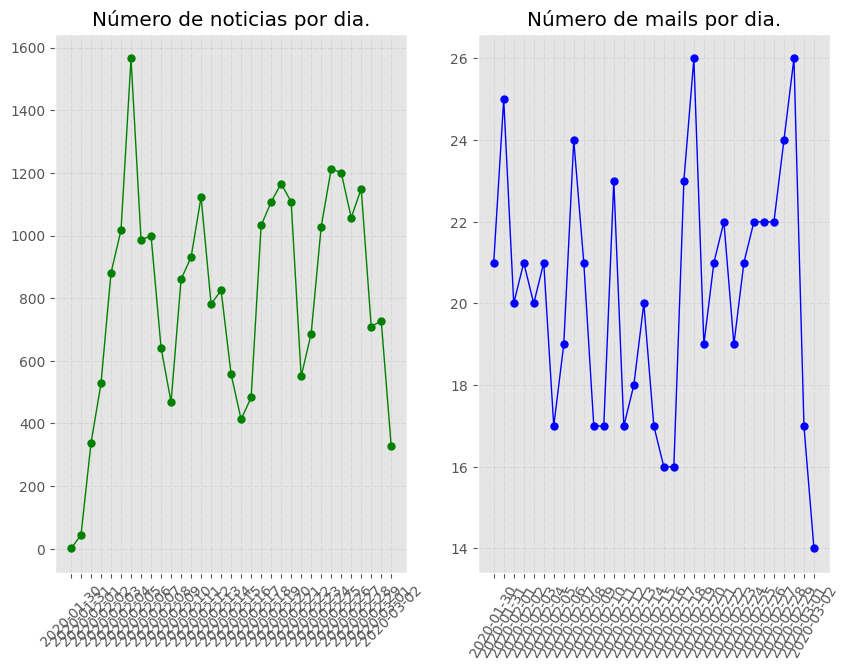

In [29]:

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(1,2,figsize=(10,7))
#fig.suptitle('')
plt.style.use("ggplot")
ax[1].plot(dates,  mails_per_day.tolist(),marker='.', linestyle='-', linewidth=1, label="Mails", markersize=10, color="blue")
ax[1].tick_params(axis='x', rotation=60)
ax[1].set_title('Número de mails por dia.')
ax[1].grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax[0].plot(dates, news_per_day.tolist(), marker='.', linestyle='-', linewidth=1, label='Noticias', markersize=10, color="green")
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Número de noticias por dia.')
ax[0].grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)



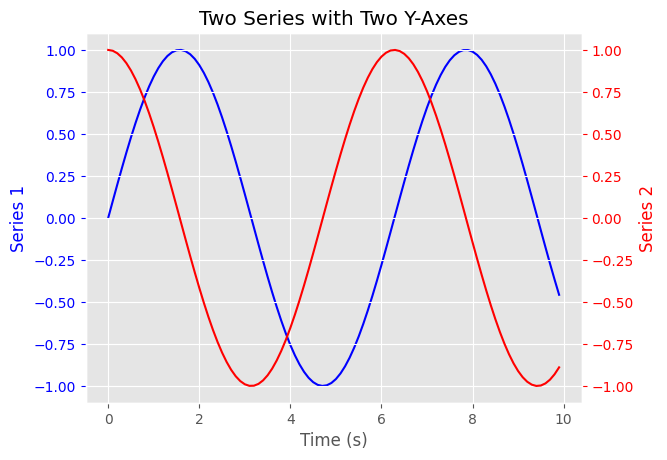

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# create sample data
t = np.arange(0.0, 10.0, 0.1)
s1 = np.sin(t)
s2 = np.cos(t)

# create figure and axis objects
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot the first series on the left axis
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Series 1', color='b')
ax1.tick_params('y', colors='b')

# plot the second series on the right axis
ax2.plot(t, s2, 'r-')
ax2.set_ylabel('Series 2', color='r')
ax2.tick_params('y', colors='r')

# add a title to the figure
plt.title('Two Series with Two Y-Axes')

# display the plot
plt.show()

In [26]:
# guardamos ewl nuevo dataframe 
data = data.reset_index()
news_final = pd.concat([data, counter_df], axis=1)
news_final.to_csv(r"D:\TFG\tfg_git\data\news3_v2.csv", index=False)

In [27]:
# guardamos nuevo dsataframe correos
mails_filtered.to_csv(r"D:\TFG\tfg_git\data\corpus_v1.0\corpus_v2.0.csv" , index=False)